In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

In [2]:
def scatter_function(x_values, y_values, title, x_label, y_label):
    """Creates a scatter plot using Seaborn, with the following inputs:
    x-values, y-values, title, x-axis label, y-axis label"""
    plt.figure(figsize=(10,8))
    ax = sns.scatterplot(x_values, y_values, color = 'mediumblue')
    ax.set_xlim(x_values.min(), x_values.max())
    ax.set_ylim(y_values.min(), y_values.max())
    plt.title(title, fontsize = 18)
    plt.xticks(rotation = 45, fontsize = 14, horizontalalignment="right")
    plt.xlabel(x_label, fontsize = 18)
    plt.yticks(fontsize = 14)
    plt.ylabel(y_label, fontsize = 18)
    plt.tight_layout()

In [3]:
weather_data_a = pd.read_csv('mpi_roof_2019a.csv', encoding='latin1')
weather_data_b = pd.read_csv('mpi_roof_2019b.csv', encoding='latin1')


In [4]:
weather_data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 22 columns):
Date Time               26064 non-null object
p (mbar)                26064 non-null float64
T (degC)                26064 non-null float64
Tpot (K)                26064 non-null float64
Tdew (degC)             26064 non-null float64
rh (%)                  26064 non-null float64
VPmax (mbar)            26064 non-null float64
VPact (mbar)            26064 non-null float64
VPdef (mbar)            26064 non-null float64
sh (g/kg)               26064 non-null float64
H2OC (mmol/mol)         26064 non-null float64
rho (g/m**3)            26064 non-null float64
wv (m/s)                26064 non-null float64
max. wv (m/s)           26064 non-null float64
wd (deg)                26064 non-null float64
rain (mm)               26064 non-null float64
raining (s)             26064 non-null float64
SWDR (W/m²)             26064 non-null float64
PAR (µmol/m²/s)         26064 non-null float64

In [5]:
weather_data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 22 columns):
Date Time               26496 non-null object
p (mbar)                26496 non-null float64
T (degC)                26496 non-null float64
Tpot (K)                26496 non-null float64
Tdew (degC)             26496 non-null float64
rh (%)                  26496 non-null float64
VPmax (mbar)            26496 non-null float64
VPact (mbar)            26496 non-null float64
VPdef (mbar)            26496 non-null float64
sh (g/kg)               26496 non-null float64
H2OC (mmol/mol)         26496 non-null float64
rho (g/m**3)            26496 non-null float64
wv (m/s)                26496 non-null float64
max. wv (m/s)           26496 non-null float64
wd (deg)                26496 non-null float64
rain (mm)               26496 non-null float64
raining (s)             26496 non-null float64
SWDR (W/m²)             26496 non-null float64
PAR (µmol/m²/s)         26496 non-null float64

In [6]:
weather_data = pd.concat([weather_data_a, weather_data_b], ignore_index = True)

In [10]:
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2019 00:10:00,1003.45,6.94,279.82,5.54,90.8,9.98,9.07,0.92,5.64,...,1.92,2.60,243.9,0.0,0.0,0.0,0.0,0.0,18.45,421.6
1,01.01.2019 00:20:00,1003.23,6.94,279.84,5.50,90.5,9.99,9.04,0.95,5.62,...,1.60,2.72,237.1,0.0,0.0,0.0,0.0,0.0,18.40,420.6
2,01.01.2019 00:30:00,1003.14,6.98,279.89,5.47,90.1,10.01,9.02,0.99,5.61,...,1.53,2.68,240.9,0.0,0.0,0.0,0.0,0.0,18.35,420.0
3,01.01.2019 00:40:00,1003.02,6.99,279.91,5.42,89.7,10.02,8.99,1.03,5.59,...,1.27,2.48,233.6,0.0,0.0,0.0,0.0,0.0,18.29,419.8
4,01.01.2019 00:50:00,1002.87,7.00,279.93,5.33,89.1,10.03,8.93,1.09,5.56,...,1.29,2.46,216.3,0.0,0.0,0.0,0.0,0.0,18.25,419.4


In [14]:
prediction_df = weather_data[['Date Time', 'T (degC)', 'p (mbar)', 'sh (g/kg)', 'wv (m/s)']].copy()


In [15]:
prediction_df.head()


,Date Time,T (degC),p (mbar),sh (g/kg),wv (m/s)
0,01.01.2019 00:10:00,6.94,1003.45,5.64,1.92
1,01.01.2019 00:20:00,6.94,1003.23,5.62,1.60
2,01.01.2019 00:30:00,6.98,1003.14,5.61,1.53
3,01.01.2019 00:40:00,6.99,1003.02,5.59,1.27
4,01.01.2019 00:50:00,7.00,1002.87,5.56,1.29


In [16]:
prediction_df['date_time'] = pd.to_datetime(prediction_df['Date Time'], format='%d.%m.%Y %H:%M:%S')
prediction_df.drop(['Date Time'], axis = 1, inplace = True)
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 5 columns):
T (degC)     52560 non-null float64
p (mbar)     52560 non-null float64
sh (g/kg)    52560 non-null float64
wv (m/s)     52560 non-null float64
date_time    52560 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.0 MB


In [17]:
prediction_df.drop_duplicates(keep = 'first', inplace  = True)

In [18]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52560 entries, 0 to 52559
Data columns (total 5 columns):
T (degC)     52560 non-null float64
p (mbar)     52560 non-null float64
sh (g/kg)    52560 non-null float64
wv (m/s)     52560 non-null float64
date_time    52560 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.4 MB


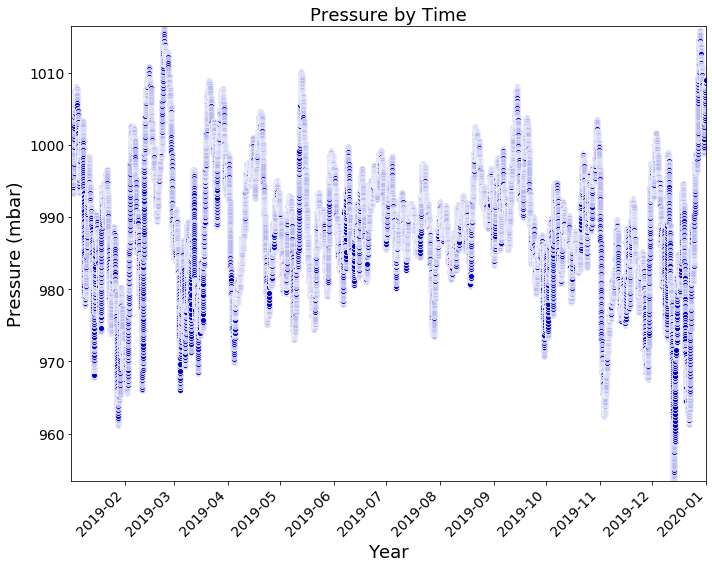

In [20]:
scatter_function(prediction_df['date_time'], prediction_df['p (mbar)'], 'Pressure by Time', 'Year', 'Pressure (mbar)')


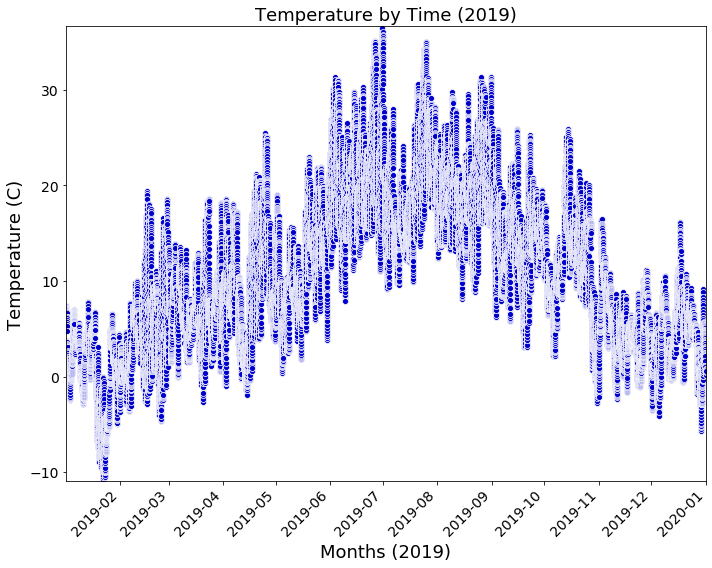

In [21]:
scatter_function(prediction_df['date_time'], prediction_df['T (degC)'], 'Temperature by Time (2019)', 'Months (2019)', 'Temperature (C)')


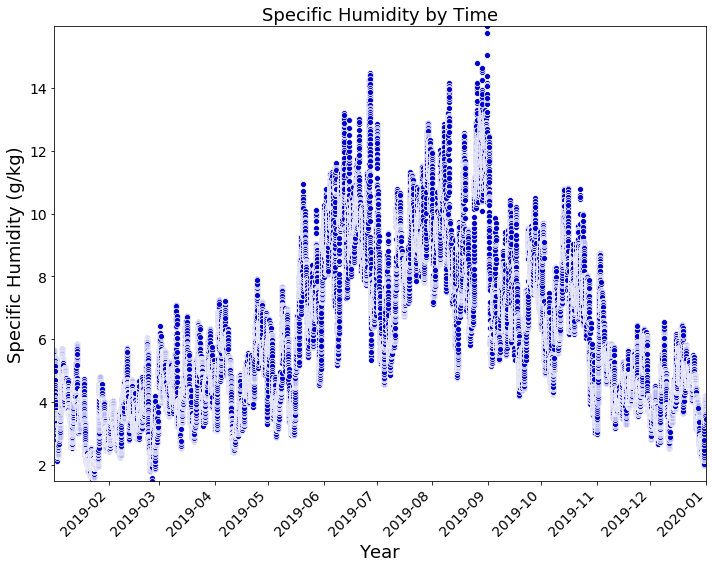

In [22]:
scatter_function(prediction_df['date_time'], prediction_df['sh (g/kg)'], 'Specific Humidity by Time', 'Year', 'Specific Humidity (g/kg)')


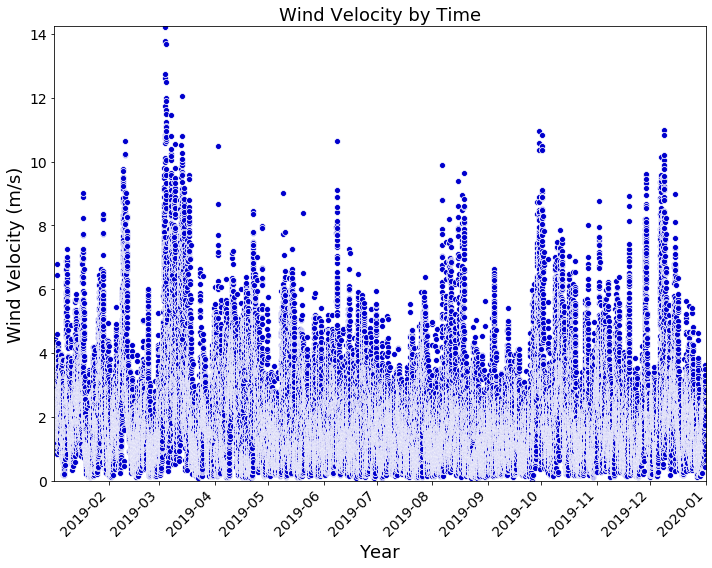

In [23]:
scatter_function(prediction_df['date_time'], prediction_df['wv (m/s)'], 'Wind Velocity by Time', 'Year', 'Wind Velocity (m/s)')


In [36]:
pred_date_range = prediction_df.iloc[-50:]

In [37]:
pred_date_range.reset_index(inplace = True)
pred_date_range.drop('index', axis = 1, inplace = True)

In [38]:
pred_date_range.head()

,T (degC),p (mbar),sh (g/kg),wv (m/s),date_time
0,4.64,1006.08,4.04,2.35,2019-12-31 15:50:00
1,4.59,1006.32,4.03,2.11,2019-12-31 16:00:00
2,4.52,1006.53,4.01,2.21,2019-12-31 16:10:00
3,4.45,1006.67,3.98,2.22,2019-12-31 16:20:00
4,4.36,1006.61,3.97,2.27,2019-12-31 16:30:00


In [39]:
pred_date_range.to_csv('2019_weather_conditions', index = False)